In [90]:
from copulae1 import *
import itertools
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 


In [20]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
rs = data.loc[:, 'log return bitcoin']
rf = data.loc[:, 'log return future']

In [966]:
i = -440
data.iloc[i:i+300,:].head()
# data.iloc[i:i+300,].tail()

,Unnamed: 0,Date,bitcoin price,Close,log return bitcoin,log return future
238,238,2020-02-25,9383.519614,9435.0,-0.023245,-0.032328
239,239,2020-02-24,9604.189826,9745.0,-0.004778,-0.014264
240,240,2020-02-21,9650.190496,9885.0,0.002843,0.012726
241,241,2020-02-20,9622.790868,9760.0,0.004456,-0.063033
242,242,2020-02-19,9580.008329,10395.0,-0.047606,-0.001922


In [967]:
# _rs = rs.copy()
_rs = data.iloc[i:i+300,4]
_rs.reset_index(drop=True, inplace=True)

# _rf = rf.copy()
_rf = data.iloc[i:i+300,5]
_rf.reset_index(drop=True, inplace=True)

contamination = (-0.2,0.2)
_rs_c = _rs.append(pd.Series([contamination[0]]), ignore_index= True)
_rf_c = _rf.append(pd.Series([contamination[1]]), ignore_index= True)

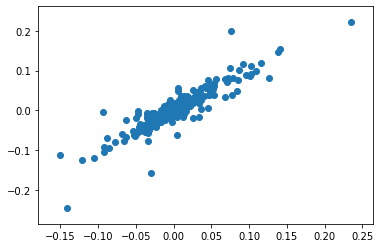

In [968]:
plt.scatter(_rs, _rf)
# plt.scatter(contamination[0], contamination[1])

In [969]:
def rho_Variance(rs, rf, h):
    rh = rs - h*rf
    return Variance(rh)

def rho_ERM10(rs, rf, h):
    rh = rs - h*rf
    return ERM_estimate_trapezoidal(10, rh)

def rho_ES1(rs, rf, h):
    rh = rs - h*rf
    return ES(0.01, rh)

def rho_ES5(rs, rf, h):
    rh = rs - h*rf
    return ES(0.05, rh)

def rho_VaR1(rs, rf, h):
    rh = rs - h*rf
    return VaR(0.01, rh)

def rho_VaR5(rs, rf, h):
    rh = rs - h*rf
    return VaR(0.05, rh)

x0=0.9
print(scipy.optimize.fmin(lambda h: rho_Variance(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_Variance(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_ERM10(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ERM10(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_ES1(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ES1(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_ES5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ES5(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0))

print(scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0))

Optimization terminated successfully.
         Current function value: 0.000721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 12
         Function evaluations: 24
[-0.10499023]
Optimization terminated successfully.
         Current function value: 0.029556
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.023115
         Iterations: 13
         Function evaluations: 26
[-0.0178418]
Optimization terminated successfully.
         Current function value: 0.135259
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 0.072952
         Iterations: 14
         Function evaluations: 28
[-0.05200195]
Optimization terminated successfully.
         Current function value: 0.061249
         Iterations: 13
         Function evaluatio

In [970]:
np.min([rs,rf])

-0.28846189083753804

In [971]:
np.max([rs,rf])

0.23522392258560595

In [972]:
# rs_c_arr = np.linspace(np.min([rs,rf]), np.max([rs,rf]), 30)
# rf_c_arr = np.linspace(np.min([rs,rf]), np.max([rs,rf]), 30)

rs_c_arr = np.linspace(-0.3, 0.3, 30)
rf_c_arr = np.linspace(-0.3, 0.3, 30)

In [973]:
contamination = pd.DataFrame((itertools.product(*[rs_c_arr, rf_c_arr])))
print(len(contamination))

900


In [974]:
IF_Variance = []
IF_ERM10 = []
IF_ES1 = []
IF_ES5 = []
IF_VaR1 = []
IF_VaR5 = []

old_h_Variance = scipy.optimize.fmin(lambda h: rho_Variance(_rs,_rf, h), x0=0.5)
old_h_ERM10 = scipy.optimize.fmin(lambda h: rho_ERM10(_rs,_rf, h), x0=0.5)
old_h_ES1 = scipy.optimize.fmin(lambda h: rho_ES1(_rs,_rf, h), x0=0.5)
old_h_ES5 = scipy.optimize.fmin(lambda h: rho_ES5(_rs,_rf, h), x0=0.5)
old_h_VaR1 = scipy.optimize.fmin(lambda h: rho_VaR1(_rs,_rf, h), x0=0.5)
old_h_VaR5 = scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0=0.5)


for i in range(len(contamination)):
    print(i)
    c = contamination.iloc[i,:]
    _rs_c = _rs.append(pd.Series([c.loc[0]]), ignore_index= True)
    _rf_c = _rf.append(pd.Series([c.loc[1]]), ignore_index= True)

    new_h_Variance = scipy.optimize.fmin(lambda h: rho_Variance(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_ERM10 = scipy.optimize.fmin(lambda h: rho_ERM10(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_ES1 = scipy.optimize.fmin(lambda h: rho_ES1(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_ES5 = scipy.optimize.fmin(lambda h: rho_ES5(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_VaR1 = scipy.optimize.fmin(lambda h: rho_VaR1(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_VaR5 = scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5,disp=False)

    IF_Variance.append(new_h_Variance-old_h_Variance)
    IF_ERM10.append(new_h_ERM10-old_h_ERM10)
    IF_ES1.append(new_h_ES1-old_h_ES1)
    IF_ES5.append(new_h_ES5-old_h_ES5)
    IF_VaR1.append(new_h_VaR1-old_h_VaR1)
    IF_VaR5.append(new_h_VaR5-old_h_VaR5)

Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.023115
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.072952
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.041861
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.045672
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 0.029656
         Iterations: 11
         Function evaluations: 22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60

In [1050]:
new_h_arr = []

kde_rs = KDE(_rs, 'Gaussian')
kde_rf = KDE(_rf, 'Gaussian')
u = ECDF(_rs)(_rs)
v = ECDF(_rf)(_rf)

C = t_Copula({'rho':0.9, 'nu':2}, kde_rs, kde_rf, 2)
# C.mm_calibrate(u,v, [0.05,0.1,0.9,0.95])
C.canonical_calibrate(u,v)
old_h = np.array(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))

for i in range(len(contamination)):
    print(i)
    c = contamination.iloc[i,:]
    _rs_c = _rs.append(pd.Series([c.loc[0]]), ignore_index= True)
    _rf_c = _rf.append(pd.Series([c.loc[1]]), ignore_index= True)

    kde_rs_c = KDE(_rs_c, 'Gaussian')
    kde_rf_c = KDE(_rf_c, 'Gaussian')
    u_c = ECDF(_rs_c)(_rs_c)
    v_c = ECDF(_rf_c)(_rf_c)

    C = t_Copula({'rho':0.9, 'nu':2}, kde_rs_c, kde_rf_c, 2)
#     C.mm_calibrate(u_c,v_c, [0.05,0.1,0.9,0.95])
    C.canonical_calibrate(u_c,v_c)

    new_h = np.array(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))
    new_h_arr.append(new_h)

Optimization terminated successfully.
         Current function value: -1.035591
         Iterations: 120
         Function evaluations: 226
Optimization terminated successfully.
         Current function value: 0.000287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022800
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.062851
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042053
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021796
         Iterations: 14
         Function evaluations: 29
0
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.042789
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.050608
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.023484
         Iterations: 13
         Function evaluations: 26
8
Optimization terminated successfully.
         Current function value: -1.038551
         Iterations: 139
         Function evaluations: 270
Optimization terminated successfully.
         Current function value: 0.000326
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.027096
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.084754
         Iterations: 11
         Function evaluations: 22
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.000333
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.027869
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.085500
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 0.045121
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.057141
         Iterations: 10
         Function evaluations: 21
Optimization terminated successfully.
         Current function value: 0.025037
         Iterations: 13
         Function evaluations: 26
17
Optimization terminated successfully.
         Current function value: -1.014526
         Iterations: 123
         Function evaluations: 238
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.055198
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.026396
         Iterations: 14
         Function evaluations: 29
25
Optimization terminated successfully.
         Current function value: -1.018191
         Iterations: 198
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.000348
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.028380
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.088026
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 0.046383
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:257: RuntimeWarning:

invalid value encountered in true_divide



Optimization terminated successfully.
         Current function value: -1.025350
         Iterations: 199
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.000343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.029345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.092065
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.047627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.055489
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.026248
         Iterations: 13
         Function evaluations: 27
27
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.077035
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.041890
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.051048
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 0.023258
         Iterations: 15
         Function evaluations: 30
35
Optimization terminated successfully.
         Current function value: -1.044200
         Iterations: 123
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 0.000308
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.025397
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

Optimization terminated successfully.
         Current function value: -1.018677
         Iterations: 125
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 0.000318
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.027178
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.080871
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.043839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.052876
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.025084
         Iterations: 13
         Function evaluations: 29
44
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.046378
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.054212
         Iterations: 11
         Function evaluations: 23
Optimization terminated successfully.
         Current function value: 0.026030
         Iterations: 13
         Function evaluations: 28
52
Optimization terminated successfully.
         Current function value: -1.014154
         Iterations: 124
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 0.000333
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.028262
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.083186
         Iterations: 12
         Function evaluations: 24
Optimization terminated succ

Optimization terminated successfully.
         Current function value: -1.054803
         Iterations: 130
         Function evaluations: 247
Optimization terminated successfully.
         Current function value: 0.000306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.068372
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.037760
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044537
         Iterations: 15
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.022573
         Iterations: 14
         Function evaluations: 31
61
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.079298
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.042476
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.049133
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.024319
         Iterations: 12
         Function evaluations: 26
69
Optimization terminated successfully.
         Current function value: -1.032902
         Iterations: 95
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: 0.000308
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.025625
         Iterations: 12
         Function evaluations: 24
Optimization terminated succe

Optimization terminated successfully.
         Current function value: -1.014526
         Iterations: 123
         Function evaluations: 238
Optimization terminated successfully.
         Current function value: 0.000319
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.026776
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.079771
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.043191
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.049429
         Iterations: 12
         Function evaluations: 25
Optimization terminated successfully.
         Current function value: 0.024907
         Iterations: 13
         Function evaluations: 28
78
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.043193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.050404
         Iterations: 12
         Function evaluations: 25
Optimization terminated successfully.
         Current function value: 0.025489
         Iterations: 14
         Function evaluations: 30
86
Optimization terminated successfully.
         Current function value: -1.025350
         Iterations: 199
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.000322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.027912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.079677
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

Optimization terminated successfully.
         Current function value: -1.044200
         Iterations: 123
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 0.000303
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.024663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.070264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.039164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.045647
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023515
         Iterations: 12
         Function evaluations: 26
95
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.074878
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040608
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.047199
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.023636
         Iterations: 12
         Function evaluations: 25
103
Optimization terminated successfully.
         Current function value: -1.018677
         Iterations: 125
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 0.000300
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.027336
         Iterations: 12
         Function evaluations: 24
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.025651
         Iterations: 12
         Function evaluations: 25
111
Optimization terminated successfully.
         Current function value: 0.000306
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.027259
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.078064
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.049971
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.026106
         Iterations: 13
         Function evaluations: 28
112
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.078662
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044232
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.051015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.026041
         Iterations: 14
         Function evaluations: 28
120
Optimization terminated successfully.
         Current function value: -1.054803
         Iterations: 130
         Function evaluations: 247
Optimization terminated successfully.
         Current function value: 0.000308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023852
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.023117
         Iterations: 13
         Function evaluations: 28
128
Optimization terminated successfully.
         Current function value: -1.038551
         Iterations: 139
         Function evaluations: 270
Optimization terminated successfully.
         Current function value: 0.000296
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.025396
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.074438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.048132
         Iterations: 14
         Function evaluations: 29
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.025754
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.074488
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.048848
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.024442
         Iterations: 12
         Function evaluations: 27
137
Optimization terminated successfully.
         Current function value: -1.014526
         Iterations: 123
         Function evaluations: 238
Optimization terminated successfully.
         Current function value: 0.000294
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.024459
         Iterations: 13
         Function evaluations: 26
145
Optimization terminated successfully.
         Current function value: -1.018191
         Iterations: 198
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 0.000312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.027276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.074892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.050310
         Iterations: 14
         Function evaluations: 29
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.023606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.067918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.037584
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044516
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.022342
         Iterations: 15
         Function evaluations: 31
154
Optimization terminated successfully.
         Current function value: -1.044200
         Iterations: 123
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 0.000301
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.048601
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.024834
         Iterations: 12
         Function evaluations: 25
162
Optimization terminated successfully.
         Current function value: -1.021848
         Iterations: 113
         Function evaluations: 218
Optimization terminated successfully.
         Current function value: 0.000293
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.025065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.069892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.039663
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000296
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.026051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.071578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.048223
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.025050
         Iterations: 12
         Function evaluations: 24
171
Optimization terminated successfully.
         Current function value: 0.000309
         Iterations: 12
         Function evaluations: 24
Optimization terminated succes

Optimization terminated successfully.
         Current function value: 0.049671
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.024788
         Iterations: 13
         Function evaluations: 30
179
Optimization terminated successfully.
         Current function value: -1.025350
         Iterations: 199
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.000306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.025824
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.071934
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.041110
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000299
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.024655
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.069044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.039000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.045974
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023554
         Iterations: 13
         Function evaluations: 26
188
Optimization terminated successfully.
         Current function value: -1.038551
         Iterations: 139
         Function evaluations: 270
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.041225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.048484
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.025253
         Iterations: 12
         Function evaluations: 26
196
Optimization terminated successfully.
         Current function value: -1.013021
         Iterations: 94
         Function evaluations: 177
Optimization terminated successfully.
         Current function value: 0.000301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.025008
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.069757
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.025943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.071478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.048288
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.024996
         Iterations: 13
         Function evaluations: 28
205
Optimization terminated successfully.
         Current function value: -1.018191
         Iterations: 198
         Function evaluations: 386
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.037408
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044167
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.022522
         Iterations: 13
         Function evaluations: 28
213
Optimization terminated successfully.
         Current function value: -1.044200
         Iterations: 123
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 0.000309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.068503
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.026403
         Iterations: 133
         Function evaluations: 258
Optimization terminated successfully.
         Current function value: 0.000301
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.024958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.070030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.039978
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.046992
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.024142
         Iterations: 13
         Function evaluations: 31
222
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.069389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.039754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.046790
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.024254
         Iterations: 15
         Function evaluations: 31
230
Optimization terminated successfully.
         Current function value: -1.018186
         Iterations: 107
         Function evaluations: 201
Optimization terminated successfully.
         Current function value: 0.000302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.025104
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.025350
         Iterations: 199
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 0.000303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.026199
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.070894
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.041385
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.049216
         Iterations: 14
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.025194
         Iterations: 14
         Function evaluations: 29
239
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.066192
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022910
         Iterations: 14
         Function evaluations: 29
247
Optimization terminated successfully.
         Current function value: -1.044939
         Iterations: 120
         Function evaluations: 234
Optimization terminated successfully.
         Current function value: 0.000284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023113
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.024796
         Iterations: 13
         Function evaluations: 28
255
Optimization terminated successfully.
         Current function value: -1.013431
         Iterations: 131
         Function evaluations: 251
Optimization terminated successfully.
         Current function value: 0.000306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.025629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.070078
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.047326
         Iterations: 14
         Function evaluations: 30
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.025845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.069808
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.040426
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.047174
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.025096
         Iterations: 13
         Function evaluations: 28
264
Optimization terminated successfully.
         Current function value: -1.012385
         Iterations: 131
         Function evaluations: 254
Optimization terminated successfully.
         Current function value: 0.000301
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066594
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044847
         Iterations: 16
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: 0.023482
         Iterations: 14
         Function evaluations: 29
273
Optimization terminated successfully.
         Current function value: -1.041552
         Iterations: 179
         Function evaluations: 347
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.037547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044118
         Iterations: 13
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.022926
         Iterations: 13
         Function evaluations: 26
281
Optimization terminated successfully.
         Current function value: -1.034883
         Iterations: 113
         Function evaluations: 216
Optimization terminated successfully.
         Current function value: 0.000287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024184
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066383
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024121
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065831
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037812
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044426
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.023138
         Iterations: 14
         Function evaluations: 28
290
Optimization terminated successfully.
         Current function value: -1.018597
         Iterations: 125
         Function evaluations: 240
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.040753
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.047264
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.025388
         Iterations: 14
         Function evaluations: 31
298
Optimization terminated successfully.
         Current function value: -1.026610
         Iterations: 126
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 0.000303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.026497
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.069523
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.036514
         Iterations: 121
         Function evaluations: 239
Optimization terminated successfully.
         Current function value: 0.000292
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023048
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064607
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043158
         Iterations: 16
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 0.021957
         Iterations: 13
         Function evaluations: 28
307
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.065938
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044466
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.023314
         Iterations: 15
         Function evaluations: 31
315
Optimization terminated successfully.
         Current function value: -1.016441
         Iterations: 94
         Function evaluations: 177
Optimization terminated successfully.
         Current function value: 0.000296
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024495
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.023916
         Iterations: 13
         Function evaluations: 27
323
Optimization terminated successfully.
         Current function value: -1.012826
         Iterations: 142
         Function evaluations: 271
Optimization terminated successfully.
         Current function value: 0.000304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024731
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066931
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.045200
         Iterations: 15
         Function evaluations: 32
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.023109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063073
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042454
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.022125
         Iterations: 14
         Function evaluations: 30
332
Optimization terminated successfully.
         Current function value: -1.030374
         Iterations: 135
         Function evaluations: 254
Optimization terminated successfully.
         Current function value: 0.000312
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.043057
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.022617
         Iterations: 14
         Function evaluations: 30
340
Optimization terminated successfully.
         Current function value: -1.042656
         Iterations: 133
         Function evaluations: 255
Optimization terminated successfully.
         Current function value: 0.000282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063380
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036036
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000292
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066001
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044558
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.023445
         Iterations: 13
         Function evaluations: 26
349
Optimization terminated successfully.
         Current function value: -1.018628
         Iterations: 122
         Function evaluations: 233
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.038794
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.045316
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.024321
         Iterations: 13
         Function evaluations: 29
357
Optimization terminated successfully.
         Current function value: -1.028395
         Iterations: 129
         Function evaluations: 245
Optimization terminated successfully.
         Current function value: 0.000292
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.025388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.067240
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.025922
         Iterations: 139
         Function evaluations: 257
Optimization terminated successfully.
         Current function value: 0.000303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023574
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064656
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043342
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.022487
         Iterations: 13
         Function evaluations: 26
366
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.064621
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043481
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.022809
         Iterations: 14
         Function evaluations: 30
374
Optimization terminated successfully.
         Current function value: -1.022386
         Iterations: 97
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: 0.000288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023782
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.023388
         Iterations: 13
         Function evaluations: 29
382
Optimization terminated successfully.
         Current function value: -1.010816
         Iterations: 91
         Function evaluations: 181
Optimization terminated successfully.
         Current function value: 0.000296
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023658
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065034
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037087
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043612
         Iterations: 13
         Function evaluations: 27
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.022526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063385
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042143
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021377
         Iterations: 13
         Function evaluations: 26
391
Optimization terminated successfully.
         Current function value: -1.020632
         Iterations: 123
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 0.000312
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.041716
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.021178
         Iterations: 13
         Function evaluations: 26
399
Optimization terminated successfully.
         Current function value: -1.023809
         Iterations: 92
         Function evaluations: 181
Optimization terminated successfully.
         Current function value: 0.000284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063688
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036094
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.000291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066039
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044550
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.023470
         Iterations: 13
         Function evaluations: 28
408
Optimization terminated successfully.
         Current function value: -1.019403
         Iterations: 94
         Function evaluations: 181
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.038416
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044821
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.023866
         Iterations: 13
         Function evaluations: 28
416
Optimization terminated successfully.
         Current function value: -1.028245
         Iterations: 122
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 0.000290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065485
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.016405
         Iterations: 118
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 0.000309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065143
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036900
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043567
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.022220
         Iterations: 14
         Function evaluations: 29
425
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.063611
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042453
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.021924
         Iterations: 14
         Function evaluations: 29
433
Optimization terminated successfully.
         Current function value: -1.031561
         Iterations: 122
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 0.000295
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.023782
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.022322
         Iterations: 13
         Function evaluations: 28
441
Optimization terminated successfully.
         Current function value: -1.016711
         Iterations: 95
         Function evaluations: 187
Optimization terminated successfully.
         Current function value: 0.000281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065689
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044319
         Iterations: 14
         Function evaluations: 29
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.024597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.067593
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038867
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.045857
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.023313
         Iterations: 14
         Function evaluations: 30
450
Optimization terminated successfully.
         Current function value: -1.016096
         Iterations: 127
         Function evaluations: 246
Optimization terminated successfully.
         Current function value: 0.000326
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.041555
         Iterations: 13
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021148
         Iterations: 13
         Function evaluations: 29
458
Optimization terminated successfully.
         Current function value: -1.013325
         Iterations: 145
         Function evaluations: 284
Optimization terminated successfully.
         Current function value: 0.000285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063710
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035982
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022640
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.062907
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041946
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.021619
         Iterations: 13
         Function evaluations: 27
467
Optimization terminated successfully.
         Current function value: -1.027376
         Iterations: 133
         Function evaluations: 247
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.037295
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043619
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.022921
         Iterations: 14
         Function evaluations: 29
475
Optimization terminated successfully.
         Current function value: -1.010558
         Iterations: 142
         Function evaluations: 267
Optimization terminated successfully.
         Current function value: 0.000301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066871
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.015176
         Iterations: 127
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 0.000313
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063318
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035532
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042007
         Iterations: 15
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.021168
         Iterations: 15
         Function evaluations: 32
484
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.063663
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036451
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042729
         Iterations: 13
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.022313
         Iterations: 13
         Function evaluations: 28
492
Optimization terminated successfully.
         Current function value: -1.020915
         Iterations: 151
         Function evaluations: 282
Optimization terminated successfully.
         Current function value: 0.000283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023370
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.022801
         Iterations: 14
         Function evaluations: 28
500
Optimization terminated successfully.
         Current function value: -1.023213
         Iterations: 141
         Function evaluations: 270
Optimization terminated successfully.
         Current function value: 0.000276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023913
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065177
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037459
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043992
         Iterations: 13
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.025150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.067066
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.039312
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.046101
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.024136
         Iterations: 13
         Function evaluations: 27
509
Optimization terminated successfully.
         Current function value: -1.029607
         Iterations: 172
         Function evaluations: 336
Optimization terminated successfully.
         Current function value: 0.000295
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.041472
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021075
         Iterations: 13
         Function evaluations: 27
517
Optimization terminated successfully.
         Current function value: -1.015479
         Iterations: 102
         Function evaluations: 195
Optimization terminated successfully.
         Current function value: 0.000288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064834
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036683
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064604
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042898
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021917
         Iterations: 14
         Function evaluations: 34
526
Optimization terminated successfully.
         Current function value: -1.033131
         Iterations: 164
         Function evaluations: 311
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.037035
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043480
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.022675
         Iterations: 14
         Function evaluations: 28
534
Optimization terminated successfully.
         Current function value: -1.016710
         Iterations: 120
         Function evaluations: 233
Optimization terminated successfully.
         Current function value: 0.000288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023885
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065704
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.019981
         Iterations: 132
         Function evaluations: 256
Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022114
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.062522
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041456
         Iterations: 14
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.021064
         Iterations: 13
         Function evaluations: 27
543
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.063971
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042703
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021741
         Iterations: 14
         Function evaluations: 28
551
Optimization terminated successfully.
         Current function value: -1.019835
         Iterations: 150
         Function evaluations: 285
Optimization terminated successfully.
         Current function value: 0.000293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023259
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.021669
         Iterations: 13
         Function evaluations: 26
559
Optimization terminated successfully.
         Current function value: -1.036080
         Iterations: 107
         Function evaluations: 203
Optimization terminated successfully.
         Current function value: 0.000291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022874
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063393
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042500
         Iterations: 13
         Function evaluations: 27
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.024377
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065896
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044651
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.023465
         Iterations: 13
         Function evaluations: 27
568
Optimization terminated successfully.
         Current function value: -1.029352
         Iterations: 140
         Function evaluations: 263
Optimization terminated successfully.
         Current function value: 0.000292
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.041793
         Iterations: 13
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021206
         Iterations: 14
         Function evaluations: 29
576
Optimization terminated successfully.
         Current function value: -1.016981
         Iterations: 158
         Function evaluations: 301
Optimization terminated successfully.
         Current function value: 0.000293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023024
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063910
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036230
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023167
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063900
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042718
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.022147
         Iterations: 14
         Function evaluations: 30
585
Optimization terminated successfully.
         Current function value: -1.019380
         Iterations: 146
         Function evaluations: 277
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.037210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043725
         Iterations: 13
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.022737
         Iterations: 13
         Function evaluations: 28
593
Optimization terminated successfully.
         Current function value: -1.022970
         Iterations: 81
         Function evaluations: 157
Optimization terminated successfully.
         Current function value: 0.000291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064840
         Iterations: 14
         Function evaluations: 28
Optimization terminated succ

Optimization terminated successfully.
         Current function value: -1.024396
         Iterations: 125
         Function evaluations: 243
Optimization terminated successfully.
         Current function value: 0.000326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064027
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036069
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042573
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.021657
         Iterations: 13
         Function evaluations: 28
602
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.063427
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036011
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042340
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021825
         Iterations: 13
         Function evaluations: 28
610
Optimization terminated successfully.
         Current function value: -1.022032
         Iterations: 132
         Function evaluations: 253
Optimization terminated successfully.
         Current function value: 0.000290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.021729
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.022494
         Iterations: 14
         Function evaluations: 29
618
Optimization terminated successfully.
         Current function value: -1.032588
         Iterations: 135
         Function evaluations: 261
Optimization terminated successfully.
         Current function value: 0.000290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023499
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064853
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043473
         Iterations: 15
         Function evaluations: 32
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.023224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063438
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036380
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.042521
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.022360
         Iterations: 14
         Function evaluations: 30
627
Optimization terminated successfully.
         Current function value: -1.031105
         Iterations: 132
         Function evaluations: 251
Optimization terminated successfully.
         Current function value: 0.000290
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.042238
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.021613
         Iterations: 13
         Function evaluations: 27
635
Optimization terminated successfully.
         Current function value: -1.022712
         Iterations: 115
         Function evaluations: 216
Optimization terminated successfully.
         Current function value: 0.000306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022492
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063552
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035702
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000304
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.024019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065956
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.037677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044208
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.022996
         Iterations: 13
         Function evaluations: 26
644
Optimization terminated successfully.
         Current function value: -1.016563
         Iterations: 128
         Function evaluations: 245
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.037147
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043387
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.022838
         Iterations: 13
         Function evaluations: 29
652
Optimization terminated successfully.
         Current function value: -1.040520
         Iterations: 121
         Function evaluations: 231
Optimization terminated successfully.
         Current function value: 0.000286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063268
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.033078
         Iterations: 129
         Function evaluations: 249
Optimization terminated successfully.
         Current function value: 0.000329
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.062333
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041478
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.021139
         Iterations: 13
         Function evaluations: 29
661
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.062696
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041620
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021109
         Iterations: 13
         Function evaluations: 29
669
Optimization terminated successfully.
         Current function value: -1.027389
         Iterations: 130
         Function evaluations: 245
Optimization terminated successfully.
         Current function value: 0.000291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.021736
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.022101
         Iterations: 14
         Function evaluations: 31
677
Optimization terminated successfully.
         Current function value: -1.026911
         Iterations: 133
         Function evaluations: 259
Optimization terminated successfully.
         Current function value: 0.000287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063732
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042511
         Iterations: 13
         Function evaluations: 29
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.023150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063534
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042476
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.022077
         Iterations: 14
         Function evaluations: 29
686
Optimization terminated successfully.
         Current function value: -1.040866
         Iterations: 144
         Function evaluations: 273
Optimization terminated successfully.
         Current function value: 0.000288
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.041221
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.020402
         Iterations: 13
         Function evaluations: 28
694
Optimization terminated successfully.
         Current function value: -1.028569
         Iterations: 175
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.000308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022021
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.062800
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035130
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000308
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063474
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035632
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042064
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.021078
         Iterations: 14
         Function evaluations: 30
703
Optimization terminated successfully.
         Current function value: -1.023398
         Iterations: 143
         Function evaluations: 279
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.036153
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042466
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.021950
         Iterations: 14
         Function evaluations: 30
711
Optimization terminated successfully.
         Current function value: -1.044329
         Iterations: 139
         Function evaluations: 268
Optimization terminated successfully.
         Current function value: 0.000287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022937
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064036
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.040866
         Iterations: 144
         Function evaluations: 273
Optimization terminated successfully.
         Current function value: 0.000294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.024305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066458
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044759
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.023061
         Iterations: 13
         Function evaluations: 28
720
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.062689
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041722
         Iterations: 14
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.021104
         Iterations: 14
         Function evaluations: 30
728
Optimization terminated successfully.
         Current function value: -1.026321
         Iterations: 167
         Function evaluations: 332
Optimization terminated successfully.
         Current function value: 0.000295
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022989
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.021197
         Iterations: 12
         Function evaluations: 26
736
Optimization terminated successfully.
         Current function value: -1.023781
         Iterations: 127
         Function evaluations: 246
Optimization terminated successfully.
         Current function value: 0.000299
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063827
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036218
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042668
         Iterations: 14
         Function evaluations: 29
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.023258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064413
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036712
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043157
         Iterations: 13
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.022181
         Iterations: 13
         Function evaluations: 29
745
Optimization terminated successfully.
         Current function value: -1.055847
         Iterations: 142
         Function evaluations: 267
Optimization terminated successfully.
         Current function value: 0.000283
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.041341
         Iterations: 15
         Function evaluations: 33
Optimization terminated successfully.
         Current function value: 0.020736
         Iterations: 13
         Function evaluations: 26
753
Optimization terminated successfully.
         Current function value: -1.028569
         Iterations: 175
         Function evaluations: 342
Optimization terminated successfully.
         Current function value: 0.000332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.021679
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.061467
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.034493
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000307
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022047
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.062643
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035162
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041502
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.020850
         Iterations: 13
         Function evaluations: 28
762
Optimization terminated successfully.
         Current function value: -1.024987
         Iterations: 116
         Function evaluations: 218
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.035529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041818
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.021411
         Iterations: 13
         Function evaluations: 28
770
Optimization terminated successfully.
         Current function value: -1.038993
         Iterations: 128
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063608
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.040866
         Iterations: 144
         Function evaluations: 273
Optimization terminated successfully.
         Current function value: 0.000297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.064582
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.043235
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.022306
         Iterations: 13
         Function evaluations: 28
779
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.061226
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.034442
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040616
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.020572
         Iterations: 15
         Function evaluations: 32
787
Optimization terminated successfully.
         Current function value: -1.036008
         Iterations: 128
         Function evaluations: 251
Optimization terminated successfully.
         Current function value: 0.000304
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022157
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.021386
         Iterations: 13
         Function evaluations: 29
795
Optimization terminated successfully.
         Current function value: -1.040282
         Iterations: 147
         Function evaluations: 274
Optimization terminated successfully.
         Current function value: 0.000303
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063425
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036023
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042359
         Iterations: 13
         Function evaluations: 27
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.022999
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063940
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042757
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021886
         Iterations: 13
         Function evaluations: 26
804
Optimization terminated successfully.
         Current function value: -1.038183
         Iterations: 135
         Function evaluations: 252
Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.040532
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.020450
         Iterations: 13
         Function evaluations: 28
812
Optimization terminated successfully.
         Current function value: -1.040587
         Iterations: 124
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 0.000343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.021650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.061472
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.034466
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000311
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.021572
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.061030
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.034284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.040433
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.020385
         Iterations: 13
         Function evaluations: 28
821
Optimization terminated successfully.
         Current function value: -1.040239
         Iterations: 131
         Function evaluations: 252
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.035433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041664
         Iterations: 14
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.021350
         Iterations: 14
         Function evaluations: 30
829
Optimization terminated successfully.
         Current function value: -1.039795
         Iterations: 121
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 0.000312
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.023051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063626
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.055847
         Iterations: 142
         Function evaluations: 267
Optimization terminated successfully.
         Current function value: 0.000308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.023274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063884
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036548
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042800
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.022085
         Iterations: 13
         Function evaluations: 27
838
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.063016
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041913
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.021285
         Iterations: 13
         Function evaluations: 28
846
Optimization terminated successfully.
         Current function value: -1.037316
         Iterations: 132
         Function evaluations: 259
Optimization terminated successfully.
         Current function value: 0.000339
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.021378
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.020586
         Iterations: 13
         Function evaluations: 26
854
Optimization terminated successfully.
         Current function value: -1.039122
         Iterations: 127
         Function evaluations: 245
Optimization terminated successfully.
         Current function value: 0.000328
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.061921
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.034967
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041208
         Iterations: 13
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.023007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063412
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.036126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042401
         Iterations: 13
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 0.021866
         Iterations: 14
         Function evaluations: 30
863
Optimization terminated successfully.
         Current function value: -1.038183
         Iterations: 135
         Function evaluations: 252
Optimization terminated successfully.
         Current function value: 0.000317
         Iterations: 12
         Function evaluations: 24
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.040978
         Iterations: 14
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.020833
         Iterations: 14
         Function evaluations: 30
871
Optimization terminated successfully.
         Current function value: -1.040587
         Iterations: 124
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 0.000374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.021458
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.060930
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.034118
         Iterations: 13
         Function evaluations: 26
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.000343
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.062804
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.035288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.041560
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.020997
         Iterations: 13
         Function evaluations: 26
880
Optimization terminated successfully.
         Current function value: -1.040236
         Iterations: 130
         Function evaluations: 243
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.035947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.042370
         Iterations: 15
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 0.021581
         Iterations: 13
         Function evaluations: 27
888
Optimization terminated successfully.
         Current function value: -1.041400
         Iterations: 123
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 0.000348
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.022842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.063162
         Iterations: 14
         Function evaluations: 28
Optimization terminated suc

Optimization terminated successfully.
         Current function value: -1.055847
         Iterations: 142
         Function evaluations: 267
Optimization terminated successfully.
         Current function value: 0.000327
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.024121
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.066350
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.038105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.044701
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.023049
         Iterations: 13
         Function evaluations: 27
897
Optimization terminated suc

In [1051]:
new_h = np.array(new_h_arr)
np.save('OHR_c_MLE.npy', new_h)

In [1025]:
IF_Variance = (new_h - old_h)[:,0]
IF_ERM10 = (new_h - old_h)[:,1]
IF_ES1 = (new_h - old_h)[:,2]
IF_ES5 = (new_h - old_h)[:,3]
IF_VaR1 = (new_h - old_h)[:,4]
IF_VaR5 = (new_h - old_h)[:,5]

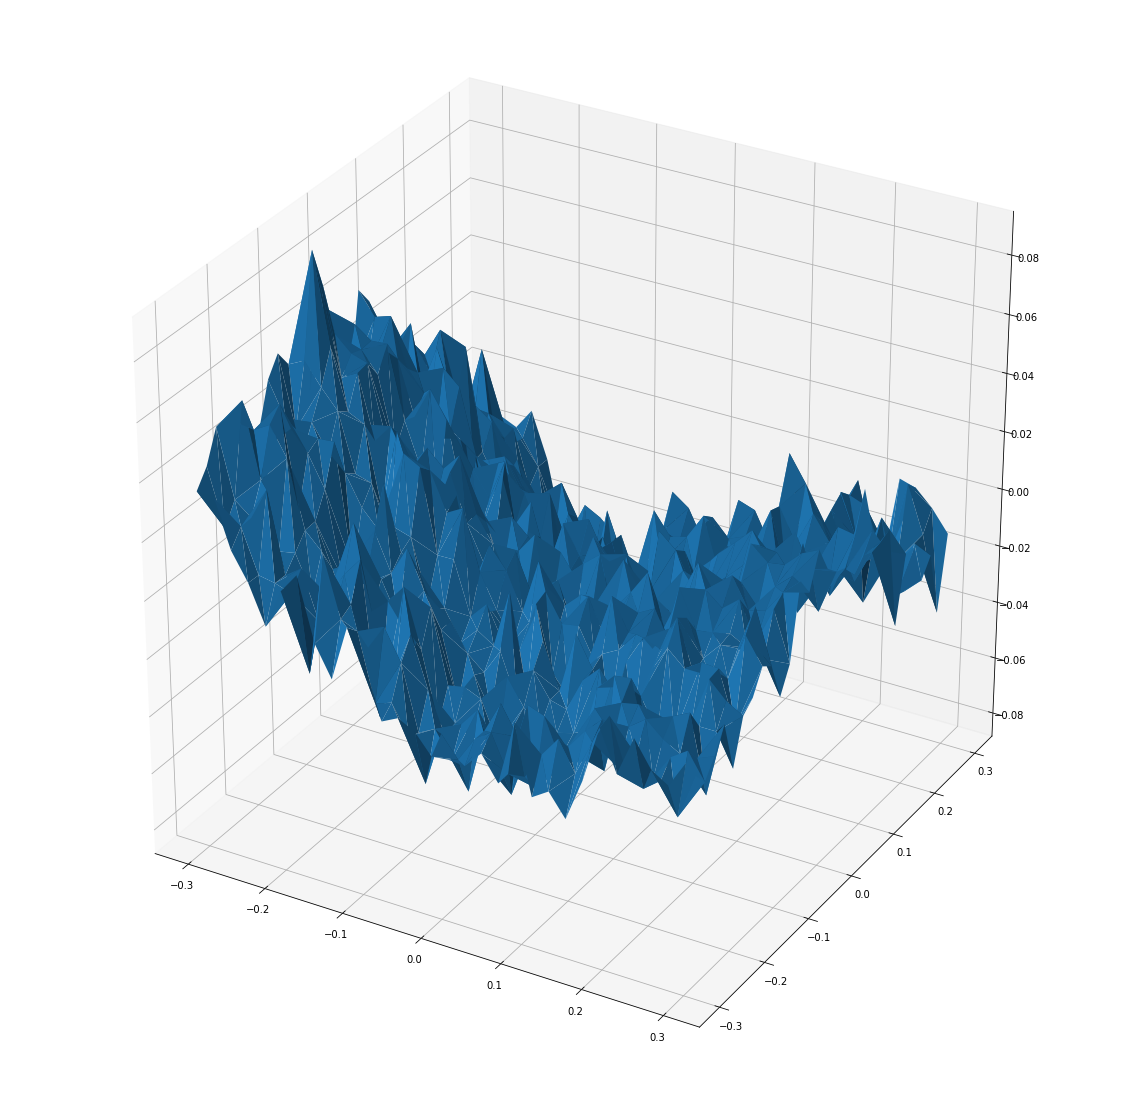

In [1026]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_Variance).flatten())
ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ERM10).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ES1).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ES5).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_VaR1).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_VaR5).flatten())

In [1027]:
toplot = pd.DataFrame({'x':contamination.iloc[:,0],'y':contamination.iloc[:,1], 'z':np.array(IF_ES1).flatten()} )
toplot = pd.pivot_table(toplot, values='z', index='x', columns='y')

toplot2 = pd.DataFrame({'x':contamination.iloc[:,0],'y':contamination.iloc[:,1], 'z':np.array(IF_VaR1).flatten()} )
toplot2 = pd.pivot_table(toplot2, values='z', index='x', columns='y')

In [1028]:
import plotly.graph_objects as go

colors1 = np.zeros(shape=toplot.shape)    
colors2 = np.ones(shape=toplot2.shape)    

cmap = plt.get_cmap("tab10")
colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
              [1, 'rgb' + str(cmap(2)[0:3])]]

fig = go.Figure()

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot.index),
    y = list(toplot.columns),
    z = toplot.values, 
    surfacecolor =colors1,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot2.index),
    y = list(toplot2.columns),
    z = toplot2.values, 
    surfacecolor =colors2,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.update_traces(showscale=False)
fig.show()


In [978]:
u = ECDF(contamination.iloc[:,0])(contamination.iloc[:,0])
v = ECDF(contamination.iloc[:,1])(contamination.iloc[:,1])


toplot = pd.DataFrame({'x':u,'y':v, 'z':np.array(IF_VaR1).flatten()} )
toplot = pd.pivot_table(toplot, values='z', index='x', columns='y')

toplot2 = pd.DataFrame({'x':u,'y':v, 'z':np.array(IF_VaR5).flatten()} )
toplot2 = pd.pivot_table(toplot2, values='z', index='x', columns='y')

In [1029]:
import plotly.graph_objects as go

colors1 = np.zeros(shape=toplot.shape)    
colors2 = np.ones(shape=toplot2.shape)    

cmap = plt.get_cmap("tab10")
colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
              [1, 'rgb' + str(cmap(2)[0:3])]]

fig = go.Figure()

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot.index),
    y = list(toplot.columns),
    z = toplot.values, 
    surfacecolor =colors1,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.add_trace(go.Surface(
    contours = {},
    x = list(toplot2.index),
    y = list(toplot2.columns),
    z = toplot2.values, 
    surfacecolor =colors2,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))


fig.update_traces(showscale=False)
fig.show()


In [1030]:
from KDEs import *

contamination = (0.2,-0.2)
_rs_c = _rs.append(pd.Series([contamination[0]]), ignore_index= True)
_rf_c = _rf.append(pd.Series([contamination[1]]), ignore_index= True)

u = ECDF(_rs)(_rs)
v = ECDF(_rf)(_rf)
kde_rs = KDE(_rs, 'Gaussian')
kde_rf = KDE(_rf, 'Gaussian')

u_c = ECDF(_rs_c)(_rs_c)
v_c = ECDF(_rf_c)(_rf_c)
kde_rs_c = KDE(_rs_c, 'Gaussian')
kde_rf_c = KDE(_rf_c, 'Gaussian')
q_arr = [0.05,0.1,0.9,0.95]


(-0.3, 0.3)

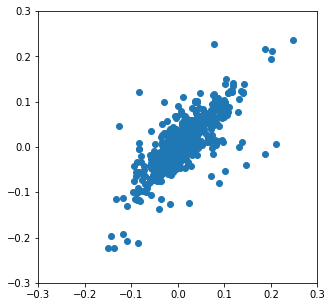

In [1031]:
C = t_Copula({'rho':0.8, 'nu':2}, kde_rs_c, kde_rf_c, 2)
s = C.sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.3))

(-0.3, 0.3)

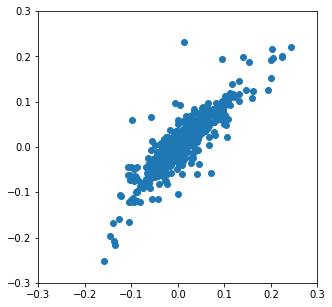

In [1032]:
C = t_Copula({'rho':0.9, 'nu':2}, kde_rs_c, kde_rf_c, 2)
s = C.sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.3))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



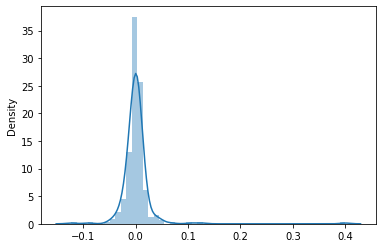

In [1033]:
sns.distplot(_rs_c - _rf_c)

0.8241206030150754
0.7185929648241205


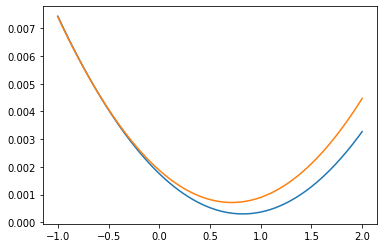

In [1034]:
h_arr = np.linspace(-1,2,200)
results = [rho_Variance(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_Variance(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.8241206030150754
0.8241206030150754


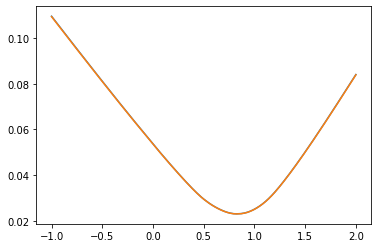

In [1035]:
results = [rho_ERM10(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])
results = [rho_ERM10(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.6281407035175879
0.6281407035175879


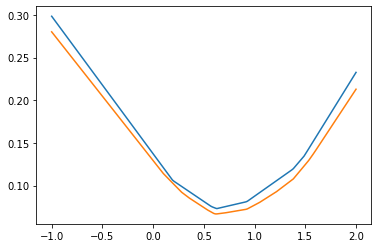

In [1036]:
results = [rho_ES1(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])
results = [rho_ES1(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.793969849246231
0.793969849246231


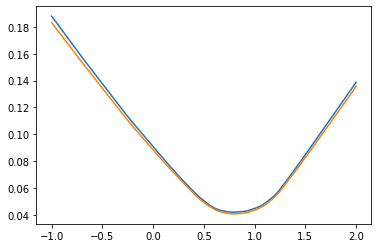

In [1037]:
results = [rho_ES5(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_ES5(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

1.0351758793969847
1.0351758793969847


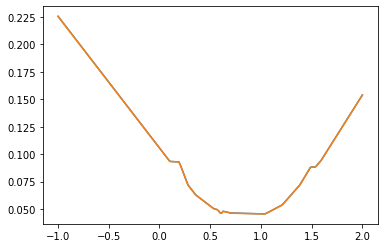

In [1038]:
results = [rho_VaR1(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_VaR1(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.8090452261306531
0.8090452261306531


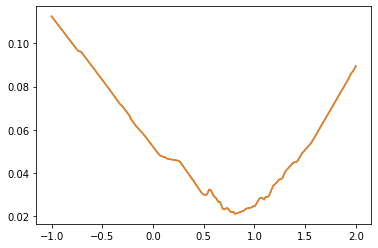

In [1039]:
results = [rho_VaR5(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

results = [rho_VaR5(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

In [1040]:
contamination = pd.DataFrame((itertools.product(*[rs_c_arr, rf_c_arr])))

dx=dy=contamination.iloc[1,1] - contamination.iloc[0,1]

In [1041]:
print(np.min(np.array(IF_ERM10).flatten()))
print(np.min(np.array(IF_Variance).flatten()))
print(np.min(np.array(IF_ES1).flatten()))
print(np.min(np.array(IF_ES5).flatten()))
print(np.min(np.array(IF_VaR1).flatten()))
print(np.min(np.array(IF_VaR5).flatten()))

-0.08476562500000007
-0.07548828125000018
-0.10390624999999998
-0.0859375
-0.12617187500000004
-0.07285156250000013


In [1042]:
print(np.max(np.array(IF_ERM10).flatten()))
print(np.max(np.array(IF_Variance).flatten()))
print(np.max(np.array(IF_ES1).flatten()))
print(np.max(np.array(IF_ES5).flatten()))
print(np.max(np.array(IF_VaR1).flatten()))
print(np.max(np.array(IF_VaR5).flatten()))

0.09091796874999991
0.09277343749999989
0.24472656250000036
0.11416015625000009
0.20371093750000013
0.07695312499999996


In [1043]:
import matplotlib.colors as colors
import matplotlib.cm as cm

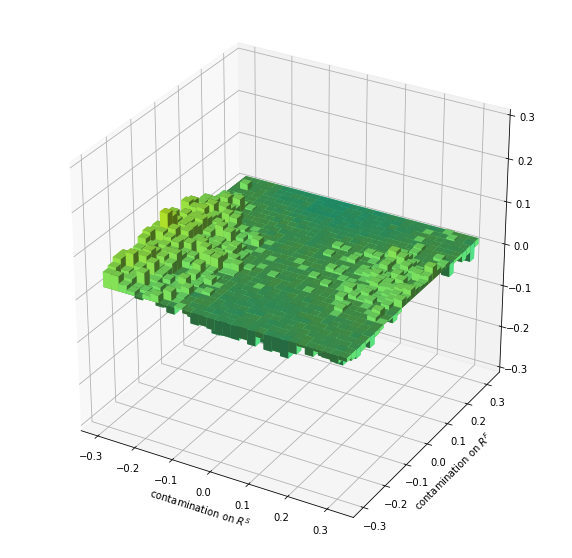

In [1044]:
dz = np.array(IF_ERM10).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
plt.show()

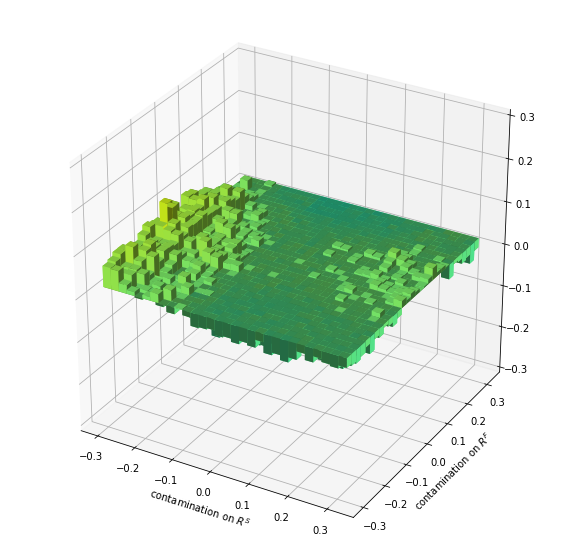

In [1045]:
dz = np.array(IF_ES5).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
plt.show()

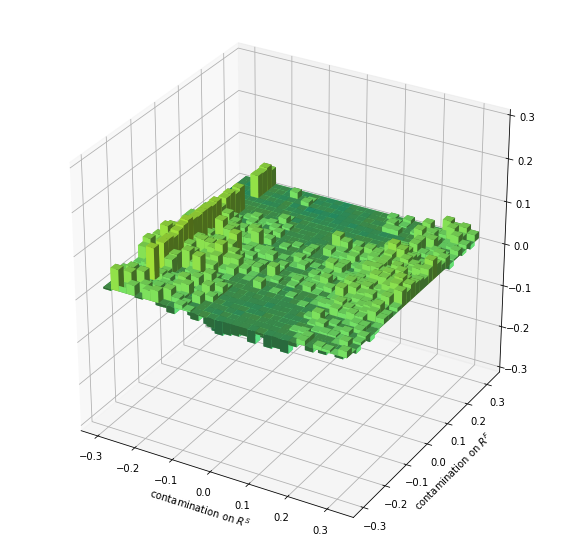

In [1046]:
dz = np.array(IF_VaR5).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
plt.show()

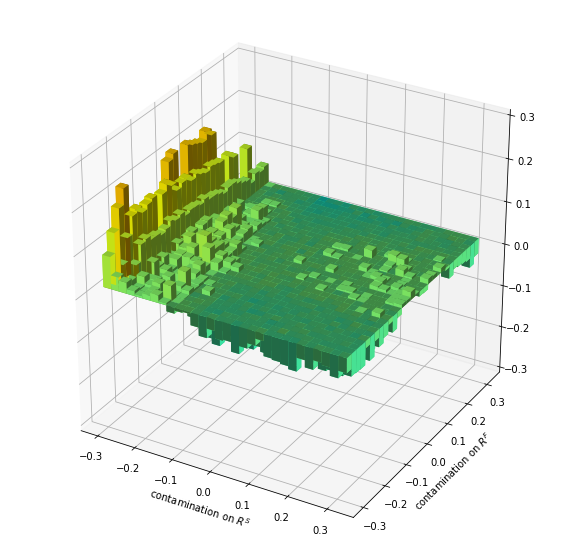

In [1047]:
dz = np.array(IF_VaR1).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
plt.show()

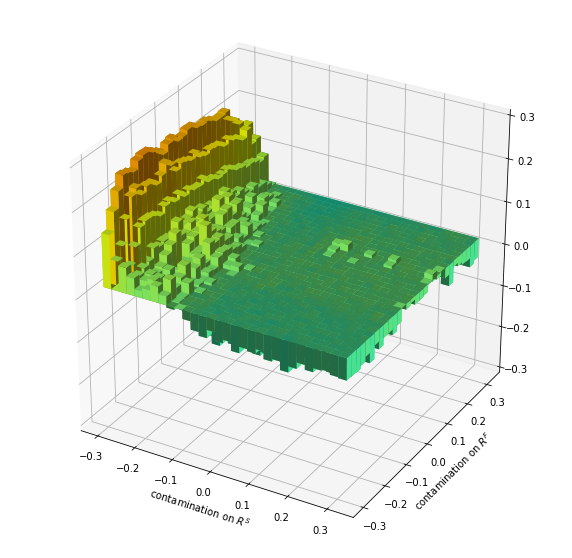

In [1048]:
dz = np.array(IF_ES1).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
plt.show()

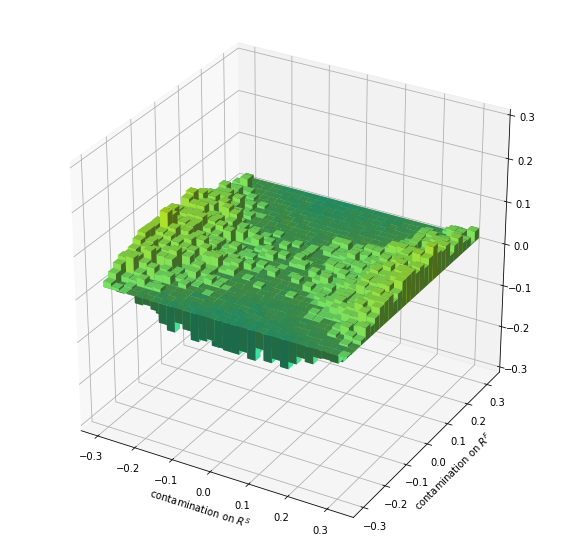

In [1049]:
dz = np.array(IF_Variance).flatten()
offset = dz 
fracs = offset.astype(float)
norm = colors.Normalize(-0.5, 0.5)
color_values = cm.jet(norm(fracs.tolist()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(contamination.iloc[:,0],
         contamination.iloc[:,1],
         0.0222, dx, dy, dz,
         color=color_values)
ax.set_zlim((-0.3, 0.3))
ax.set_xlabel(r'contamination on $R^S$')
ax.set_ylabel(r'contamination on $R^F$')
plt.show()

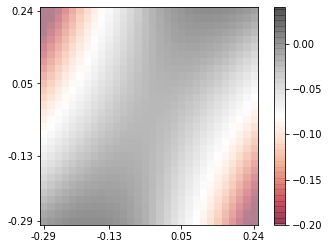

In [1006]:
toplot3 = contamination.copy()
toplot3.columns = ['rs', 'rf']
toplot3.loc[:,'IF'] = pd.Series(np.array(IF_Variance).flatten())
toplot3 = toplot3.pivot_table(index='rs', columns='rf', values='IF')

plt.imshow(toplot3, origin='lower',
           cmap='RdGy', alpha=0.5, vmin=-0.2, vmax=0.04)

plt.xticks(show_ticks,x_ticks)
plt.yticks(show_ticks,y_ticks)
plt.colorbar()